## Business Understanding

### Context


The global job market for AI and Data Science roles is rapidly expanding as organizations accelerate AI adoption across industries. AI-related job postings have increased significantly in recent years, with some reports showing growth of over 70% year-over-year, and median salaries for AI engineers reaching around $185,000 annually. This growth is driven by rising demand for advanced technical skills, remote work normalization, and global digital transformation. Companies need insights into skill demand, salary benchmarks, and workforce distribution, while job seekers must understand which skills to prioritize and where opportunities are highest.


### Problem statement


Despite the rapid growth of AI and Data Science roles globally, there is limited structured insight into the evolving patterns of skill demand, salary distribution, and workforce trends across regions and experience levels. Organizations lack data-driven guidance for competitive compensation and talent acquisition, while job seekers face uncertainty about which skills to prioritize and what salary expectations are realistic. Therefore, there is a need to analyze the Global AI Job Market dataset to uncover key trends and develop predictive models that support informed decision-making for both employers and professionals.

### Specific Objectives

- Determine the top 20 most frequently requested skills in AI-related roles.

- Calculate average and median salaries by:

   * Country

   *  Experience level

   *  Remote vs On-site status

- Analyze the percentage distribution of remote, hybrid, and on-site roles.

- Identify correlations between experience level and salary.

- Build and evaluate a regression model to predict salary.

- Build a classification model to predict job level based on skills.

### Defined Success Metrics


- For Salary Prediction (Regression Model)

*  MAE (Mean Absolute Error) → Measures average prediction error.

*  RMSE (Root Mean Squared Error) → Penalizes larger errors.

*  R² Score → Measures how well the model explains salary variation.
Success Criteria:

- R² ≥ 0.70

Low MAE relative to the salary range

### Proposed Stakeholders

- Tech companies and hiring managers

- Human Resource (HR) departments

- AI and Data Science job seekers

- Recruitment agencies

- Universities and training institutions

## Data Understanding

**Data Source**

The dataset used in this project is the Global AI Job Market & Salary Trends (2025) dataset obtained from Kaggle. It contains structured information about AI and Data Science job postings, including job titles, skills, salary ranges, experience levels, work type (remote/on-site), and location.

**Data Description**

- job_id – Unique identifier for each job posting

- job_title – Title of the position

- salary_usd – Annual salary in USD (Target Variable)

- salary_currency – Original salary currency

- experience_level – Entry, Mid, Senior, Executive

- employment_type – Full-time, Part-time, Contract, etc.

- company_location – Country where the company is based

- company_size – Size category of the company

- employee_residence – Country of employee residence

- remote_ratio – Percentage indicating remote work (0, 50, 100)

- required_skills – Skills listed in the job posting (text data)

- education_required – Minimum education qualification

- years_experience – Required years of experience

- industry – Industry sector

- posting_date – Date the job was posted

- application_deadline – Deadline for applications

- job_description_length – Length of job description

- benefits_score – Numeric rating of job benefits

- company_name – Name of the company

In [1]:
import pandas as pd
# Load the datasets
df1 = pd.read_csv('Data/ai_job_dataset.csv')
df2 = pd.read_csv('Data/ai_job_dataset1.csv')

# Look at the first few rows of the primary dataset
print("Dataset 1 Head:")
display(df1.head())

# Check basic info (columns, data types, and null values)
print("\nDataset 1 Info:")
df1.info()

Dataset 1 Head:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics



Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date         

In [2]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   salary_local            15000 non-null  int64  
 5   experience_level        15000 non-null  object 
 6   employment_type         15000 non-null  object 
 7   company_location        15000 non-null  object 
 8   company_size            15000 non-null  object 
 9   employee_residence      15000 non-null  object 
 10  remote_ratio            15000 non-null  int64  
 11  required_skills         15000 non-null  object 
 12  education_required      15000 non-null  object 
 13  years_experience        15000 non-null  int64  
 14  industry                15000 non-null

In [7]:
df1.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [8]:
df2.head()

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,Data Scientist,219728,USD,219728,EX,PT,Sweden,M,Sweden,0,"Python, Computer Vision, R, Docker",Associate,13,Transportation,2024-09-23,2024-10-31,1132,6.6,TechCorp Inc
1,AI00002,Head of AI,230237,JPY,25326070,EX,PT,Japan,L,Japan,50,"Kubernetes, MLOps, Tableau, Python",Bachelor,10,Transportation,2024-07-26,2024-09-12,2299,8.5,Cloud AI Solutions
2,AI00003,Data Engineer,128890,EUR,109557,EX,CT,Germany,S,Germany,100,"Spark, Scala, Hadoop, PyTorch, GCP",Bachelor,12,Automotive,2025-01-19,2025-03-28,1329,5.5,Quantum Computing Inc
3,AI00004,Computer Vision Engineer,96349,USD,96349,MI,FL,Finland,L,Finland,50,"MLOps, Linux, Tableau, Python",PhD,2,Automotive,2024-07-20,2024-09-06,1132,6.8,Cognitive Computing
4,AI00005,Robotics Engineer,63065,EUR,53605,EN,FT,France,S,France,100,"R, Scala, SQL, GCP, Python",Associate,0,Finance,2025-03-16,2025-05-09,2011,9.3,Advanced Robotics


**Descriptive Statistics**

In [3]:
df1.describe(include='all')

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
count,15000,15000,15000.000000,15000,15000,15000,15000,15000,15000,15000.000000,15000,15000,15000.000000,15000,15000,15000,15000.000000,15000.000000,15000
unique,15000,20,NaN,3,4,4,20,3,20,NaN,13663,4,NaN,15,486,543,NaN,NaN,16
top,AI15000,Machine Learning Researcher,NaN,USD,MI,FT,Germany,S,Sweden,NaN,"Python, TensorFlow, PyTorch",Bachelor,NaN,Retail,2024-07-05,2025-01-05,NaN,NaN,TechCorp Inc
freq,1,808,NaN,11957,3781,3812,814,5007,790,NaN,17,3789,NaN,1063,51,47,NaN,NaN,980
mean,NaN,NaN,115348.965133,NaN,NaN,NaN,NaN,NaN,NaN,49.483333,NaN,NaN,6.253200,NaN,NaN,NaN,1503.314733,7.504273,NaN
std,NaN,NaN,60260.940438,NaN,NaN,NaN,NaN,NaN,NaN,40.812712,NaN,NaN,5.545768,NaN,NaN,NaN,576.127083,1.450870,NaN
min,NaN,NaN,32519.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,500.000000,5.000000,NaN
25%,NaN,NaN,70179.750000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,1003.750000,6.200000,NaN
50%,NaN,NaN,99705.000000,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,5.000000,NaN,NaN,NaN,1512.000000,7.500000,NaN
75%,NaN,NaN,146408.500000,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,10.000000,NaN,NaN,NaN,2000.000000,8.800000,NaN


In [4]:
df2.describe(include='all')

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
count,15000,15000,15000.000000,15000,1.500000e+04,15000,15000,15000,15000,15000,15000.000000,15000,15000,15000.000000,15000,15000,15000,15000.000000,15000.000000,15000
unique,15000,20,NaN,8,NaN,4,4,20,3,50,NaN,13651,4,NaN,15,486,543,NaN,NaN,16
top,AI15000,Machine Learning Engineer,NaN,USD,NaN,EX,CT,Switzerland,L,Switzerland,NaN,"Python, TensorFlow, Tableau",Bachelor,NaN,Government,2025-04-16,2024-10-07,NaN,NaN,Machine Intelligence Group
freq,1,824,NaN,7453,NaN,3843,3841,819,5087,669,NaN,9,3863,NaN,1035,49,49,NaN,NaN,986
mean,NaN,NaN,121991.938267,NaN,8.292366e+05,NaN,NaN,NaN,NaN,NaN,50.196667,NaN,NaN,6.365667,NaN,NaN,NaN,1500.852600,7.499540,NaN
std,NaN,NaN,63968.361846,NaN,3.425325e+06,NaN,NaN,NaN,NaN,NaN,40.844084,NaN,NaN,5.598551,NaN,NaN,NaN,574.724647,1.444202,NaN
min,NaN,NaN,16621.000000,NaN,1.662100e+04,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,500.000000,5.000000,NaN
25%,NaN,NaN,74978.500000,NaN,7.383075e+04,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,998.750000,6.300000,NaN
50%,NaN,NaN,107261.500000,NaN,1.090355e+05,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,5.000000,NaN,NaN,NaN,1512.000000,7.500000,NaN
75%,NaN,NaN,155752.250000,NaN,1.673278e+05,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,10.000000,NaN,NaN,NaN,1994.000000,8.800000,NaN


In [5]:
# 1. Load the data
df_main = pd.read_csv('Data/ai_job_dataset.csv')
df_alt = pd.read_csv('Data/ai_job_dataset1.csv')

# 2. Define a simple function to print the audit
def audit_dataset(df, filename):
    print(f"=== Audit for: {filename} ===")
    
    # Check dimensions
    rows, cols = df.shape
    print(f"Total Rows: {rows} | Total Columns: {cols}")
    
    # Check for exact row duplicates
    duplicates = df.duplicated().sum()
    print(f"Duplicate Rows Found: {duplicates}")
    
    # Check for missing values (nulls)
    print("\nMissing Values per Column:")
    missing_counts = df.isnull().sum()
    
    # Only show columns that actually have missing values
    only_missing = missing_counts[missing_counts > 0]
    if only_missing.empty:
        print("No missing values found!")
    else:
        # Calculate percentage for context
        for col, count in only_missing.items():
            percentage = (count / rows) * 100
            print(f"- {col}: {count} ({percentage:.2f}%)")
    print("\n" + "-"*30 + "\n")

# 3. Run the audit for both files
audit_dataset(df1, "ai_job_dataset.csv")
audit_dataset(df2, "ai_job_dataset1.csv")

# 4. Check for overlap between the two files
# (This assumes they share the same column names)
df= pd.concat([df1, df2])
total_overlap = df.duplicated().sum()
print(f"Total Duplicate Rows if we merge both files: {total_overlap}")

=== Audit for: ai_job_dataset.csv ===
Total Rows: 15000 | Total Columns: 19
Duplicate Rows Found: 0

Missing Values per Column:
No missing values found!

------------------------------

=== Audit for: ai_job_dataset1.csv ===
Total Rows: 15000 | Total Columns: 20
Duplicate Rows Found: 0

Missing Values per Column:
No missing values found!

------------------------------

Total Duplicate Rows if we merge both files: 0


### Data Preparation

#### Data cleaning

In [6]:
# Merge the datasets
df = pd.concat([df1,df2], ignore_index=True)
# 3. Handle the 'posting_date' (Convert to datetime)
# Note: errors='coerce' turns unparseable dates into NaT (Not a Time)
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')

# 4. Check the new shape to see how much data remains
print(f"Original Row Count: {len(df)}")
print(f"Cleaned Row Count: {len(df.dropna(subset=['posting_date']))}")
print(f"Rows removed: {len(df) - len(df.dropna(subset=['posting_date']))}")

Original Row Count: 30000
Cleaned Row Count: 30000
Rows removed: 0


#### Data visualization

**Salary Distribution by Experience Level**


This is the most critical insight for a job dataset. It helps us see the spread of pay (e.g., how much more a "Senior" (SE) makes compared to "Entry" (EN)).

C:\Users\USER\AppData\Local\Temp\ipykernel_21500\2194647030.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='salary_usd', palette='magma')


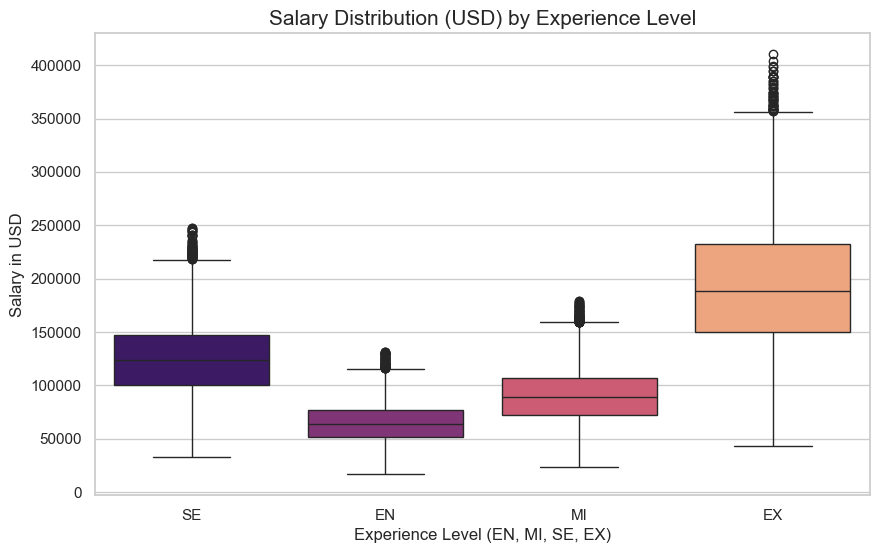

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional visual theme
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_usd', palette='magma')

plt.title('Salary Distribution (USD) by Experience Level', fontsize=15)
plt.xlabel('Experience Level (EN, MI, SE, EX)', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.show()

**Top Industries Hiring for AI**

This identifies which sectors are currently dominating the AI job market in your data.

C:\Users\USER\AppData\Local\Temp\ipykernel_21500\2718896923.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.values, y=top_industries.index, palette='viridis')


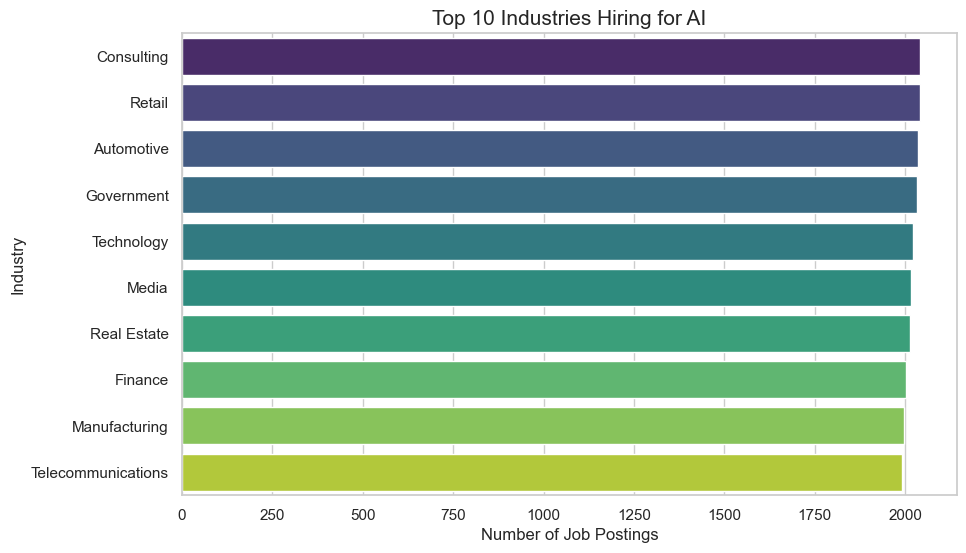

In [10]:
plt.figure(figsize=(10, 6))
top_industries = df['industry'].value_counts().head(10)

sns.barplot(x=top_industries.values, y=top_industries.index, palette='viridis')
plt.title('Top 10 Industries Hiring for AI', fontsize=15)
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.show()

**Skill Frequency Analysis**

Since your required_skills column contains multiple values (like "Python, AWS"), we can visualize the most in-demand tools. This requires a small procedural "flattening" of the list.

C:\Users\USER\AppData\Local\Temp\ipykernel_21500\101543085.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skills_counts.values, y=skills_counts.index, palette='coolwarm')


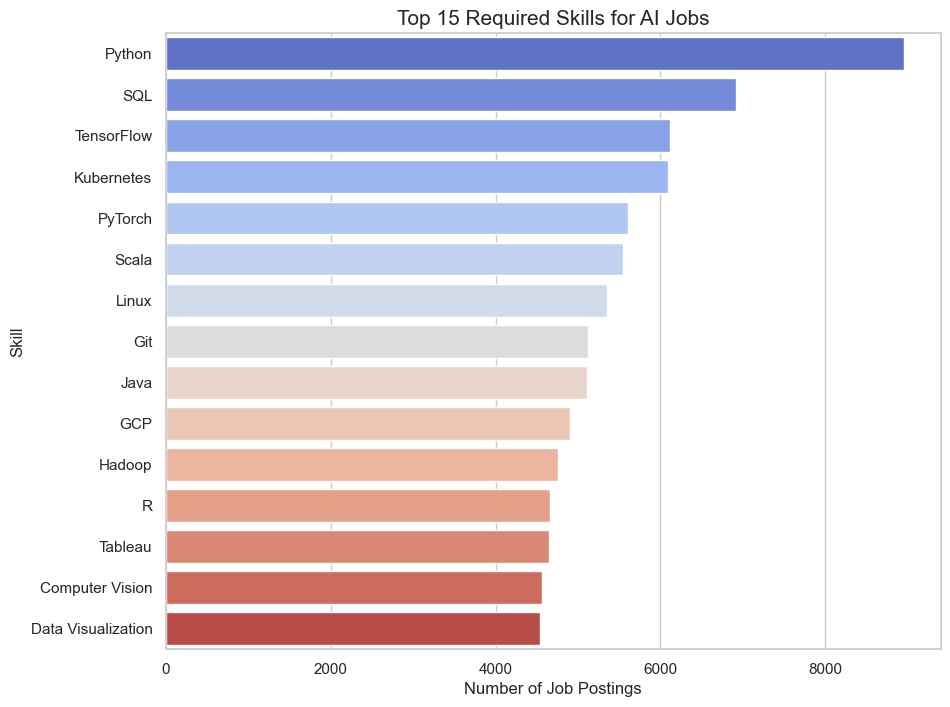

In [11]:
# Split the skills string into individual items and count them
all_skills = df["required_skills"].str.split(', ').explode()
skills_counts = all_skills.value_counts().head(15)

plt.figure(figsize=(10, 8))
sns.barplot(x=skills_counts.values, y=skills_counts.index, palette='coolwarm')
plt.title('Top 15 Required Skills for AI Jobs', fontsize=15)
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Skill', fontsize=12)
plt.show()  